In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Data loading
df = pd.read_excel('dataset.xlsx', dtypes={'Error_message':'str'}, parse_dates=['date'])

In [3]:
# Filling Nan values with 0 in column 'number_of_errors'
df['number_of_errors'].fillna(0, inplace=True)

# Filling Nan values with '' in column 'Error_message'
df['Error_message'].fillna('', inplace=True)

# Casting type of column 'number_of_errors' from float to int32
df = df.astype({'number_of_errors':'int32'})

# Question 1.1
## Conversion rate for the first week of January

In [4]:
conversion_rate = np.sum(df['converted_visitors'])/np.sum(df['visitors'])*100
print(f'Conversion rate for the first week of January is {conversion_rate:.2} %')

Conversion rate for the first week of January is 0.91 %


In [5]:
def get_conversion_rate(df, col_name, threshold=30):
    q = df.groupby(col_name).agg({'visitors': np.sum,'converted_visitors': np.sum})
    q['ConversionRate'] = q['converted_visitors']/q['visitors']*100
    q = q[q['converted_visitors'] > threshold]
    return q.sort_values(by='converted_visitors', ascending=False)

In [6]:
# Setting parameters for visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rc('xtick', labelsize=15)

# Question 1.2
## Conversion rate for the first week of January in % by days

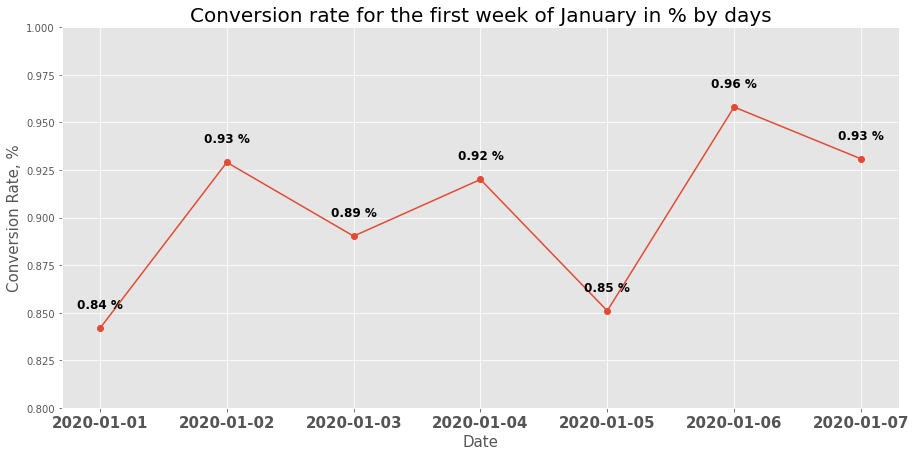

In [35]:
q1_2 = get_conversion_rate(df, 'date')
q1_2 = q1_2.sort_index()

_ = plt.plot(q1_2['ConversionRate'], marker='o')
_ = plt.xlabel('Date', fontsize=15)
_ = plt.ylabel('Conversion Rate, %', fontsize=15)
_ = plt.title('Conversion rate for the first week of January in % by days', fontsize=20)
_ = plt.ylim(0.8,1)
_ = plt.xticks(weight='bold')

for x,y in zip(q1_2.index, q1_2['ConversionRate']):
    label = '{:.2f} %'.format(y)
    
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 20), ha='center', fontsize=12, fontweight='bold')

plt.show()

# Question 1.3
## Conversion rate for the first week of January in % by devices

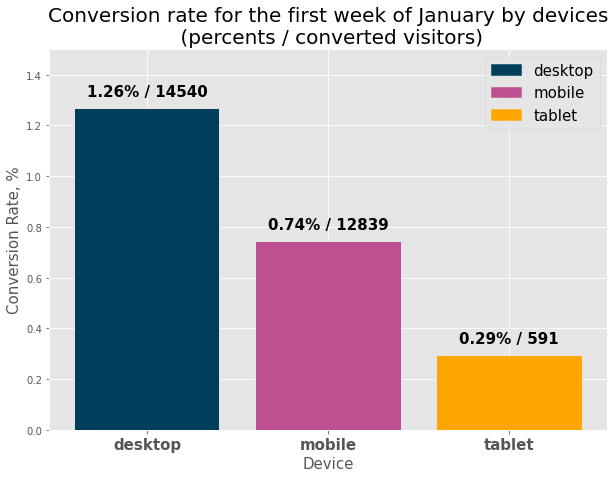

In [8]:
q1_3 = get_conversion_rate(df, 'deviceCategory')

plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams["legend.fontsize"] = 15

colors = {'#003f5c':'desktop', '#bc5090': 'mobile', '#ffa600': 'tablet'}
patches = [mpatches.Patch(color='#003f5c', label='desktop'),
           mpatches.Patch(color='#bc5090', label='mobile'),
           mpatches.Patch(color='#ffa600', label='tablet')]
_ = plt.bar(q1_3.index, q1_3['ConversionRate'], color=colors)
_ = plt.xlabel('Device', fontsize=15)
_ = plt.ylabel('Conversion Rate, %', fontsize=15)
_ = plt.title('Conversion rate for the first week of January by devices\n (percents / converted visitors)', fontsize=20)
_ = plt.ylim(0, 1.5)
_ = plt.xticks(weight='bold')
_ = plt.legend(handles=patches)

for x,y in zip(q1_3.index, q1_3['ConversionRate']):
    u = str(q1_3['converted_visitors'].loc[x])
    label = '{:.2f}%'.format(y) + ' / ' + u
    
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

# Question 1.4
## Conversion rate for the first week of January by mediums

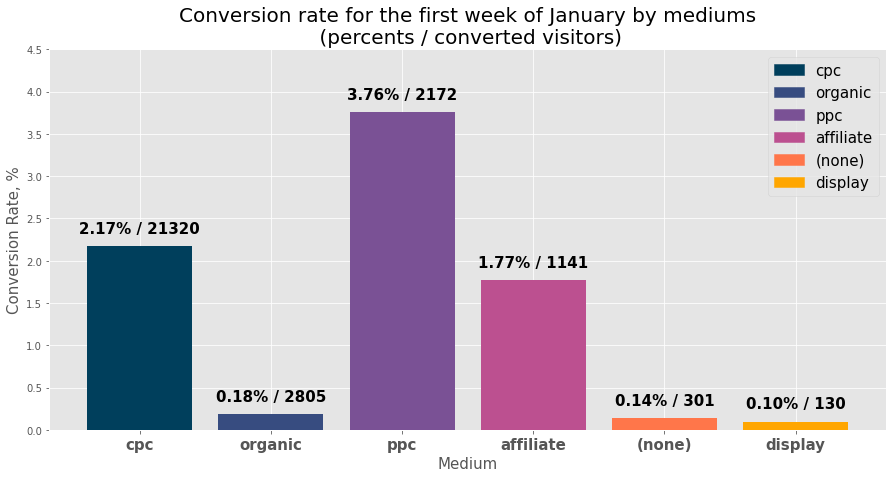

In [9]:
q1_4 = get_conversion_rate(df, 'medium')
q1_4 = q1_4.sort_values(by='converted_visitors', ascending=False)

q1_4 = q1_4[q1_4['converted_visitors'] > 100]

plt.rcParams['figure.figsize'] = (15, 7)

colors = {'#003f5c':'cpc', '#374c80': 'organic', '#7a5195': 'ppc','#bc5090':'affiliate','#ff764a':'(none)','#ffa600':'display'}
patches = [mpatches.Patch(color='#003f5c', label='cpc'),
           mpatches.Patch(color='#374c80', label='organic'),
           mpatches.Patch(color='#7a5195', label='ppc'),
           mpatches.Patch(color='#bc5090', label='affiliate'),
           mpatches.Patch(color='#ff764a', label='(none)'),
           mpatches.Patch(color='#ffa600', label='display')]

_ = plt.bar(q1_4.index, q1_4['ConversionRate'], color=colors)
_ = plt.xlabel('Medium', fontsize=15)
_ = plt.ylabel('Conversion Rate, %', fontsize=15)
_ = plt.title('Conversion rate for the first week of January by mediums\n (percents / converted visitors)', fontsize=20)
_ = plt.ylim(0, 4.5)
_ = plt.xticks(weight='bold')
_ = plt.legend(handles=patches)

for x,y in zip(q1_4.index, q1_4['ConversionRate']):
    u = str(q1_4['converted_visitors'].loc[x])
    label = '{:.2f}%'.format(y) + ' / ' + u
    
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

# Question 1.5
## Conversion rate for the first week of January for desktop by mediums

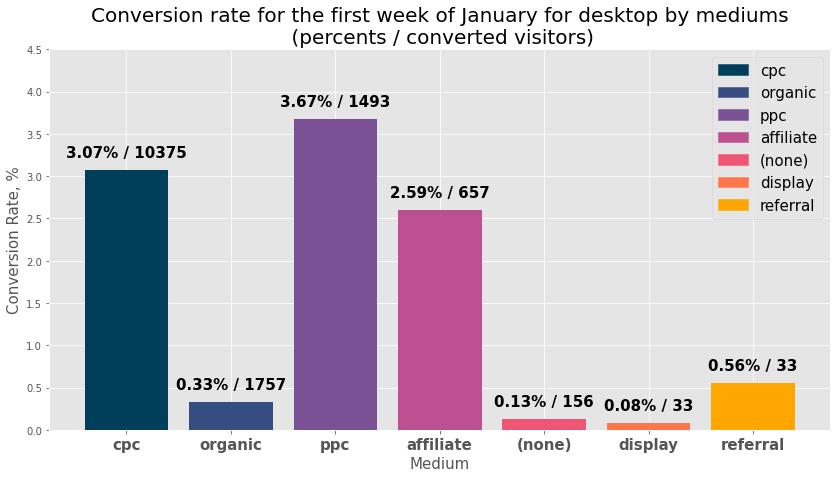

In [10]:
q1_5 = df[df['deviceCategory'] == 'desktop']
q1_5 = get_conversion_rate(q1_5, 'medium')

plt.rcParams['figure.figsize'] = (14, 7)

colors = {'#003f5c':'cpc', '#374c80': 'organic', '#7a5195': 'ppc',
          '#bc5090':'affiliate','#ef5675':'(none)','#ff764a':'display', '#ffa600':'referral'}
patches = [mpatches.Patch(color='#003f5c', label='cpc'),
           mpatches.Patch(color='#374c80', label='organic'),
           mpatches.Patch(color='#7a5195', label='ppc'),
           mpatches.Patch(color='#bc5090', label='affiliate'),
           mpatches.Patch(color='#ef5675', label='(none)'),
           mpatches.Patch(color='#ff764a', label='display'),
           mpatches.Patch(color='#ffa600', label='referral')]

_ = plt.bar(q1_5.index, q1_5['ConversionRate'], color = colors)
_ = plt.xlabel('Medium', fontsize=15)
_ = plt.ylabel('Conversion Rate, %', fontsize=15)
_ = plt.title('Conversion rate for the first week of January for desktop by mediums\n (percents / converted visitors)', fontsize=20)
_ = plt.ylim(0, 4.5)
_ = plt.xticks(weight='bold')
_ = plt.legend(handles=patches)

for x,y in zip(q1_5.index, q1_5['ConversionRate']):
    u = str(q1_5['converted_visitors'].loc[x])
    label = '{:.2f}%'.format(y) + ' / ' + u
    
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

# Question 1.6
## Conversion rate for the first week of January for mobile by mediums

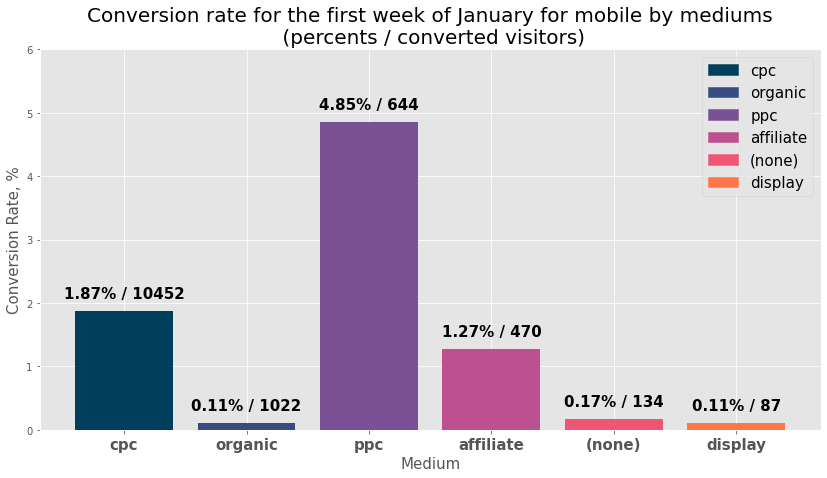

In [11]:
q1_6 = df[df['deviceCategory'] == 'mobile']
q1_6 = get_conversion_rate(q1_6, 'medium')

colors = {'#003f5c':'cpc', '#374c80': 'organic', '#7a5195': 'ppc',
          '#bc5090':'affiliate','#ef5675':'(none)','#ff764a':'display'}
patches = [mpatches.Patch(color='#003f5c', label='cpc'),
           mpatches.Patch(color='#374c80', label='organic'),
           mpatches.Patch(color='#7a5195', label='ppc'),
           mpatches.Patch(color='#bc5090', label='affiliate'),
           mpatches.Patch(color='#ef5675', label='(none)'),
           mpatches.Patch(color='#ff764a', label='display')]

_ = plt.bar(q1_6.index, q1_6['ConversionRate'], color = colors)
_ = plt.xlabel('Medium', fontsize=15)
_ = plt.ylabel('Conversion Rate, %', fontsize=15)
_ = plt.title('Conversion rate for the first week of January for mobile by mediums\n (percents / converted visitors)', fontsize=20)
_ = plt.ylim(0, 6)
_ = plt.xticks(weight='bold')
_ = plt.legend(handles=patches)

for x,y in zip(q1_6.index, q1_6['ConversionRate']):
    u = str(q1_6['converted_visitors'].loc[x])
    label = '{:.2f}%'.format(y) + ' / ' + u
    
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

# Question 1.7
## Conversion rate for the first week of January in % for tablets by mediums

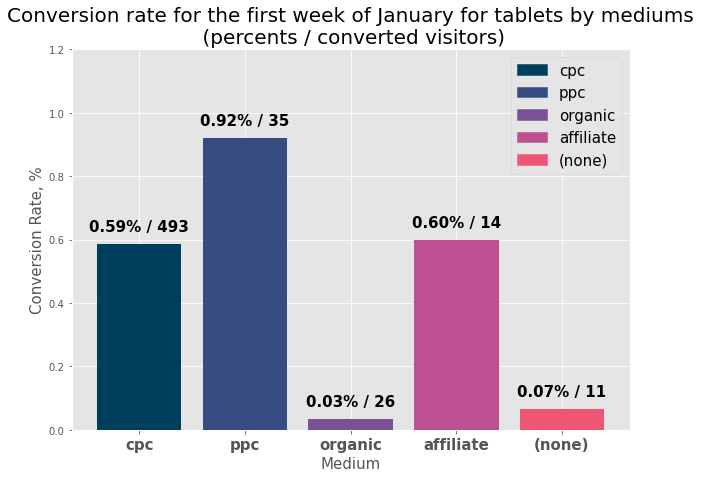

In [12]:
q1_7 = df[df['deviceCategory'] == 'tablet']
q1_7 = get_conversion_rate(q1_7, 'medium', threshold=10)

plt.rcParams['figure.figsize'] = (10, 7)

colors = {'#003f5c':'cpc', '#374c80': 'ppc', '#7a5195': 'organic',
          '#bc5090':'affiliate','#ef5675':'(none)'}
patches = [mpatches.Patch(color='#003f5c', label='cpc'),
           mpatches.Patch(color='#374c80', label='ppc'),
           mpatches.Patch(color='#7a5195', label='organic'),
           mpatches.Patch(color='#bc5090', label='affiliate'),
           mpatches.Patch(color='#ef5675', label='(none)')]

_ = plt.bar(q1_7.index, q1_7['ConversionRate'], color = colors)
_ = plt.xlabel('Medium', fontsize=15)
_ = plt.ylabel('Conversion Rate, %', fontsize=15)
_ = plt.title('Conversion rate for the first week of January for tablets by mediums\n (percents / converted visitors)', fontsize=20)
_ = plt.ylim(0, 1.2)
_ = plt.xticks(weight='bold')
_ = plt.legend(handles=patches)

for x,y in zip(q1_7.index, q1_7['ConversionRate']):
    u = str(q1_7['converted_visitors'].loc[x])
    label = '{:.2f}%'.format(y) + ' / ' + u
    
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

In [13]:
def split_messages(row):
    #row = df['Error_message'].iloc[0]
    row = row.replace('.', '')
    # Firstly, split error messages by '.||' and then split each separate message by '.,'
    messages = [m.split(', ') for m in row.split('||')]

    # Merge all sublists in one list
    messages = [m for sub_message in messages for m in sub_message]

    return messages

In [14]:
def get_messages_stats(df):
    messages = pd.Series(df['Error_message'].apply(lambda x: split_messages(x) if x else np.nan)).dropna().sum()
    return pd.Series(messages).value_counts()

# Question 2

In [15]:
q2 = df.copy()
q2['no_errors'] = q2['number_of_errors'] == 0

# Question 2.1
## Number of visitors who attempted to pay in the first week of January

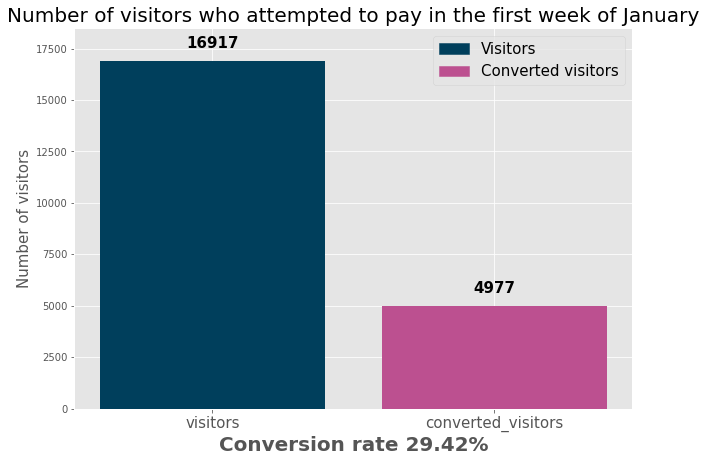

In [16]:
q2_1 = get_conversion_rate(q2, 'no_errors')

colors = {'#003f5c':'visitors', '#bc5090': 'converted_visitors'}
patches = [mpatches.Patch(color='#003f5c', label='Visitors'),
           mpatches.Patch(color='#bc5090', label='Converted visitors')]

title = 'Number of visitors who attempted to pay in the first week of January'
_ = plt.bar(q2_1.columns[:-1], q2_1.loc[False][:-1], color=colors)
_ = plt.xlabel('Conversion rate {:.2f}%'.format(q2_1.loc[False]['ConversionRate']), fontsize=20, fontweight='bold')
_ = plt.ylabel('Number of visitors', fontsize=15)
_ = plt.title(title, fontsize=20)
_ = plt.ylim(0, 18500)
_ = plt.legend(handles=patches)

for x,y in zip(q2_1.columns[:-1], q2_1.loc[False][:-1]):
    plt.annotate(int(y), (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

In [17]:
# Якщо людина ввела правильний email, то надсилати їй на нього поради, як заповнити поля з помилками
def fix_email_index(df):
    list_index = df.index.tolist()
    idx = list_index.index('It looks like you entered an email address that doesnâ€™t exist Please try re-entering')
    list_index[idx] = 'Non-existent email'
    df.index = list_index
    return df

# Question 2.2
## Number of occasions of errors for the first week of January for desktop

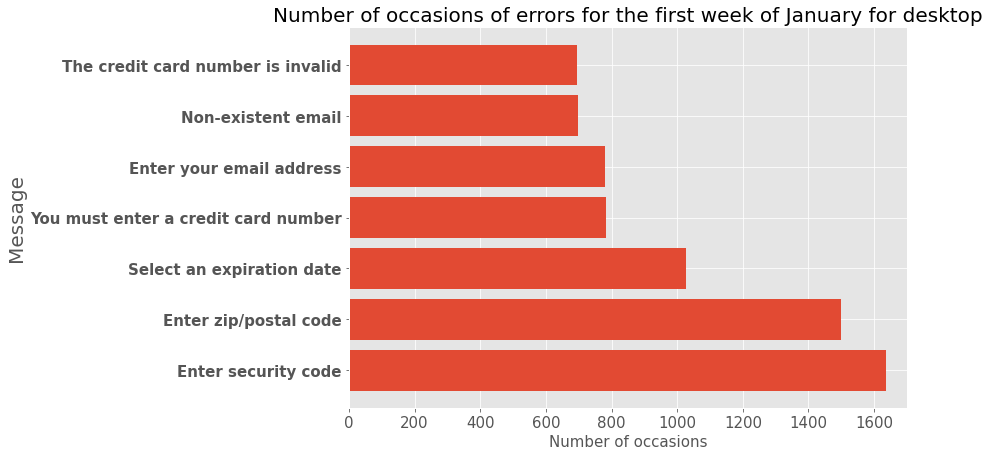

In [18]:
q2_2 = q2[q2['deviceCategory'] == 'desktop']

q2_2_messages = get_messages_stats(q2_2)
q2_2_messages = q2_2_messages[q2_2_messages > 200]
q2_2_messages = fix_email_index(q2_2_messages)

_ = plt.barh(q2_2_messages.index, q2_2_messages)
_ = plt.xlabel('Number of occasions', fontsize=15)
_ = plt.ylabel('Message', fontsize=20)
_ = plt.title('Number of occasions of errors for the first week of January for desktop', fontsize=20)
_ = plt.xlim(0, 1700)
_ = plt.yticks(size=15, weight='bold')

plt.show()

# Поставити 3 графіки поруч для Conversion rate/False 

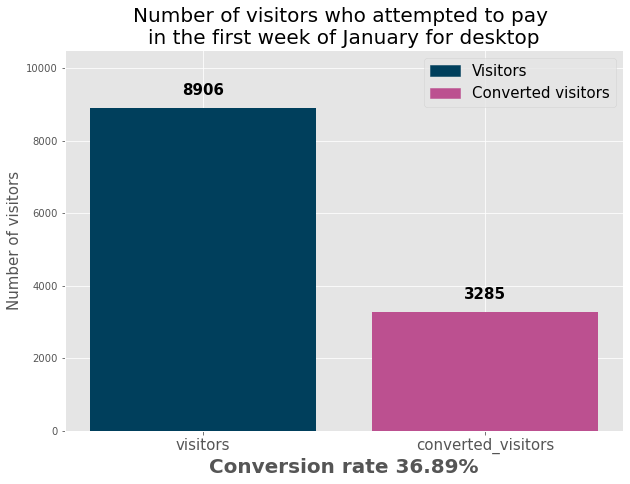

In [19]:
q2_2 = get_conversion_rate(q2_2, 'no_errors')
q2_2

title = 'Number of visitors who attempted to pay \nin the first week of January for desktop'
_ = plt.bar(q2_2.columns[:-1], q2_2.loc[False][:-1], color=colors)
_ = plt.xlabel('Conversion rate {:.2f}%'.format(q2_2.loc[False]['ConversionRate']), fontsize=20, fontweight='bold')
_ = plt.ylabel('Number of visitors', fontsize=15)
_ = plt.title(title, fontsize=20)
_ = plt.ylim(0, 10500)
_ = plt.legend(handles=patches)

for x,y in zip(q2_2.columns[:-1], q2_2.loc[False][:-1]):
    plt.annotate(int(y), (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

# Question 2.3
## Number of occasions of errors for the first week of January for mobile

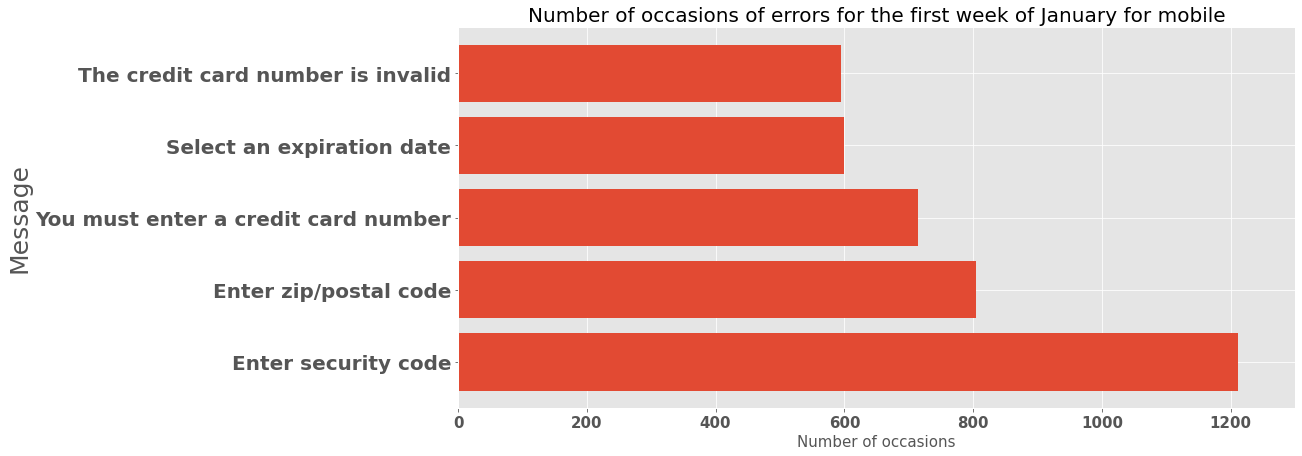

In [40]:
q2_3 = q2[q2['deviceCategory'] == 'mobile']
q2_3_messages = get_messages_stats(q2_3)
q2_3_messages = q2_3_messages[q2_3_messages > 100]

_ = plt.barh(q2_3_messages.index, q2_3_messages)
_ = plt.xlabel('Number of occasions', fontsize=15)
_ = plt.ylabel('Message', fontsize=25)
_ = plt.title('Number of occasions of errors for the first week of January for mobile', fontsize=20)
_ = plt.xlim(0, 1300)
_ = plt.xticks(weight='bold')
_ = plt.yticks(size=20, weight='bold')

plt.show()

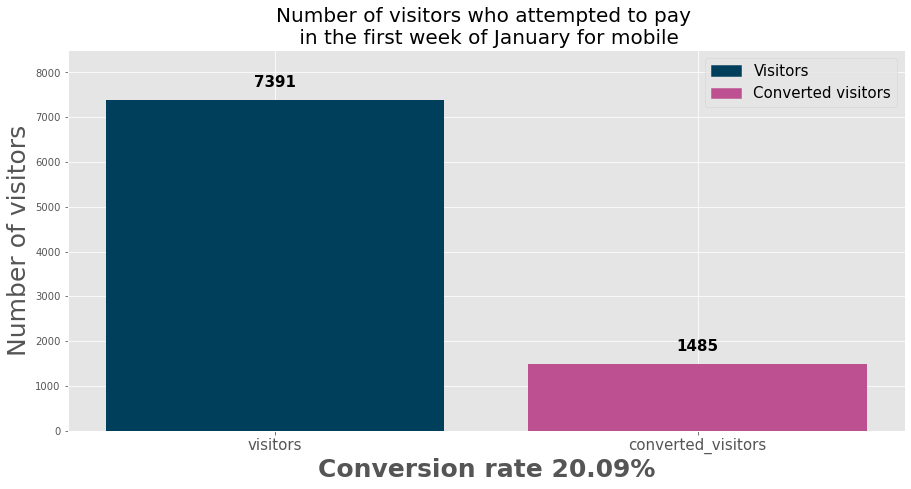

In [42]:
q2_3 = get_conversion_rate(q2_3, 'no_errors')

title = 'Number of visitors who attempted to pay \n in the first week of January for mobile'
_ = plt.bar(q2_3.columns[:-1], q2_3.loc[False][:-1], color=colors)
_ = plt.xlabel('Conversion rate {:.2f}%'.format(q2_3.loc[False]['ConversionRate']), fontsize=25, fontweight='bold')
_ = plt.ylabel('Number of visitors', fontsize=25)
_ = plt.title(title, fontsize=20)
_ = plt.ylim(0, 8500)
_ = plt.legend(handles=patches)

for x,y in zip(q2_3.columns[:-1], q2_3.loc[False][:-1]):
    plt.annotate(int(y), (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

# Question 2.4

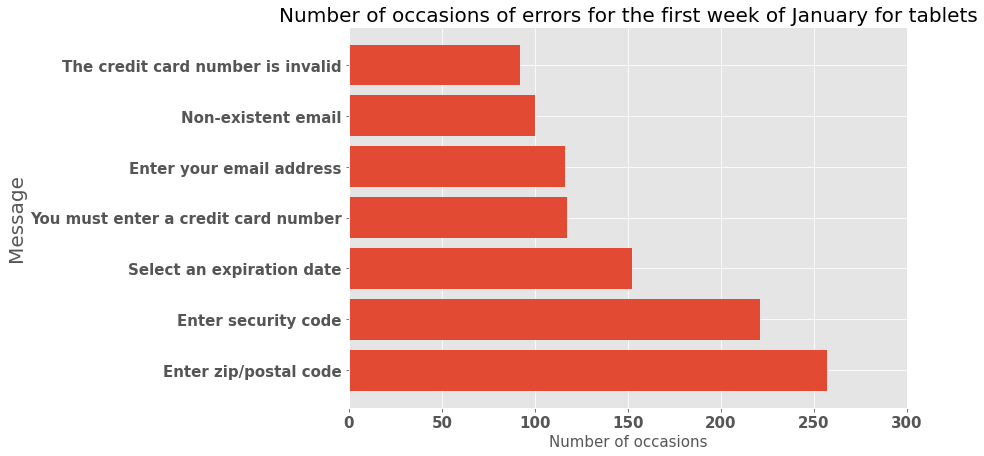

In [22]:
q2_4 = q2[q2['deviceCategory'] == 'tablet']

q2_4_messages = get_messages_stats(q2_4)
q2_4_messages = q2_4_messages[q2_4_messages > 10]
q2_4_messages = fix_email_index(q2_4_messages)

_ = plt.barh(q2_4_messages.index, q2_4_messages)
_ = plt.xlabel('Number of occasions', fontsize=15)
_ = plt.ylabel('Message', fontsize=20)
_ = plt.title('Number of occasions of errors for the first week of January for tablets', fontsize=20)
_ = plt.xlim(0, 300)
_ = plt.xticks(weight='bold')
_ = plt.yticks(size=15, weight='bold')

plt.show()

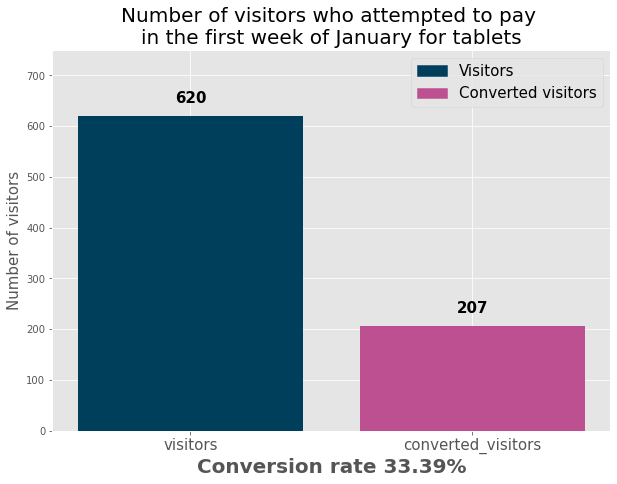

In [23]:
q2_4 = get_conversion_rate(q2_4, 'no_errors')

title = 'Number of visitors who attempted to pay \nin the first week of January for tablets'
_ = plt.bar(q2_4.columns[:-1], q2_4.loc[False][:-1], color=colors)
_ = plt.xlabel('Conversion rate {:.2f}%'.format(q2_4.loc[False]['ConversionRate']), fontsize=20, fontweight='bold')
_ = plt.ylabel('Number of visitors', fontsize=15)
_ = plt.title(title, fontsize=20)
_ = plt.ylim(0, 750)
_ = plt.legend(handles=patches)

for x,y in zip(q2_4.columns[:-1], q2_4.loc[False][:-1]):
    plt.annotate(int(y), (x,y), textcoords='offset points', xytext=(0, 13), ha='center', fontsize=15, fontweight='bold')

plt.show()

# Question 2.5
## Number of occasions of errors for the first week of January

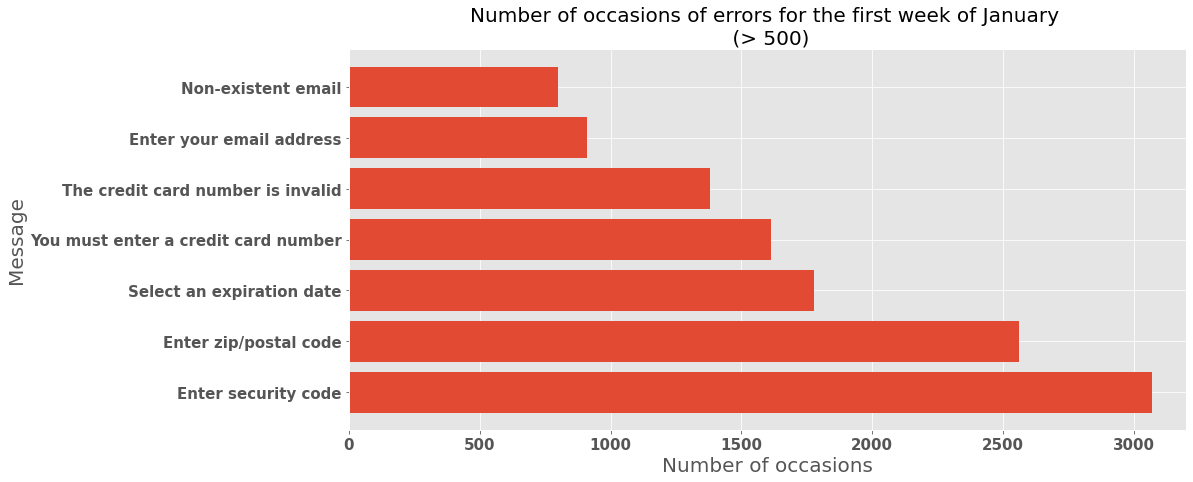

In [31]:
q2_5 = get_messages_stats(df)

q2_5_messages = q2_5[q2_5 > 500]
q2_5_messages = fix_email_index(q2_5_messages)

_ = plt.barh(q2_5_messages.index, q2_5_messages)
_ = plt.xlabel('Number of occasions', fontsize=20)
_ = plt.ylabel('Message', fontsize=20)
_ = plt.title('Number of occasions of errors for the first week of January \n (> 500)', fontsize=20)
_ = plt.xlim(0, 3200)
_ = plt.xticks(weight='bold')
_ = plt.yticks(size=15, weight='bold')

plt.show()

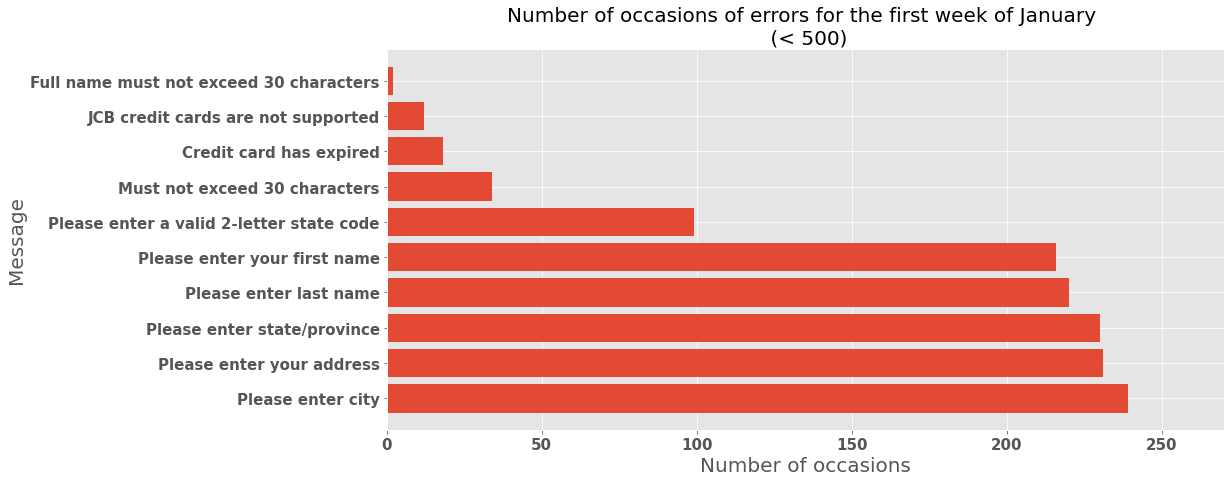

In [47]:
q2_5_messages = q2_5[q2_5 < 500]

_ = plt.barh(q2_5_messages.index, q2_5_messages)
_ = plt.xlabel('Number of occasions', fontsize=20)
_ = plt.ylabel('Message', fontsize=20)
_ = plt.title('Number of occasions of errors for the first week of January \n (< 500)', fontsize=20)
_ = plt.xlim(0, 270)
_ = plt.xticks(weight='bold')
_ = plt.yticks(size=15, weight='bold')

plt.show()

# Question 2.6
## Conversion Rate for payment errors for the first week of January

In [26]:
df_with_errors = pd.DataFrame(columns=df.columns)

for index, row in df.iterrows():
    if row['Error_message']:
        test_row_messages = split_messages(row['Error_message'])
        temp_rows = pd.DataFrame(columns=df.columns)
        for message in test_row_messages:
            row_with_error = row.copy()
            row_with_error['Error_message'] = message
            if temp_rows.empty:
                temp_rows = pd.DataFrame(row_with_error).transpose()
            else:
                temp_rows = temp_rows.append(row_with_error, ignore_index = True)
        if df_with_errors.empty:
            df_with_errors = temp_rows
        else:
            df_with_errors = pd.concat([df_with_errors, temp_rows])

In [27]:
q2_6 = get_conversion_rate(df_with_errors, 'Error_message')
q2_6 = fix_email_index(q2_6).sort_values('ConversionRate', ascending=False)

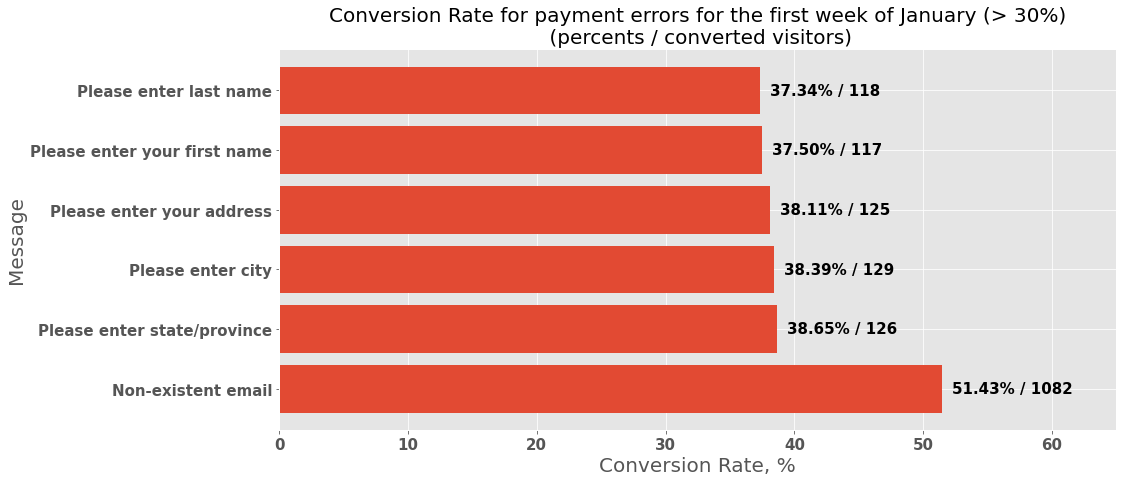

In [32]:
q2_6_messages = q2_6[q2_6['ConversionRate'] > 30]

plt.rcParams['figure.figsize'] = (15, 7)

_ = plt.barh(q2_6_messages.index, q2_6_messages['ConversionRate'])
_ = plt.xlabel('Conversion Rate, %', fontsize=20)
_ = plt.ylabel('Message', fontsize=20)
_ = plt.title('Conversion Rate for payment errors for the first week of January (> 30%)\n (percents / converted visitors)', fontsize=20)
_ = plt.xlim(0, 65)
_ = plt.xticks(weight='bold')
_ = plt.yticks(size=15, weight='bold')

for x,y in zip(q2_6_messages.index, q2_6_messages['ConversionRate']):
    u = str(q2_6_messages['converted_visitors'].loc[x])
    label = '{:.2f}%'.format(y) + ' / ' + u
    
    plt.annotate(label, (y, x ), textcoords='offset points', xytext=(10, 0), va='center', fontsize=15, fontweight='bold')
    
plt.show()

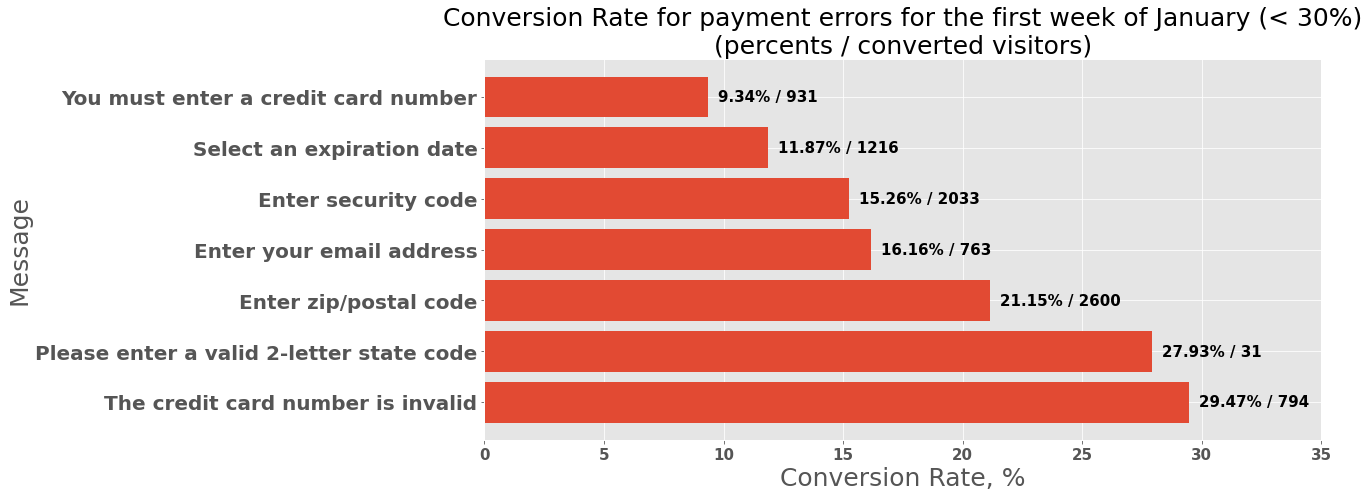

In [45]:
q2_6_messages = q2_6[q2_6['ConversionRate'] < 30]

_ = plt.barh(q2_6_messages.index, q2_6_messages['ConversionRate'])
_ = plt.xlabel('Conversion Rate, %', fontsize=25)
_ = plt.ylabel('Message', fontsize=25)
_ = plt.title('Conversion Rate for payment errors for the first week of January (< 30%)\n(percents / converted visitors)', fontsize=25)
_ = plt.xlim(0, 35)
_ = plt.xticks(weight='bold')
_ = plt.yticks(size=20, weight='bold')

for x,y in zip(q2_6_messages.index, q2_6_messages['ConversionRate']):
    u = str(q2_6_messages['converted_visitors'].loc[x])
    label = '{:.2f}%'.format(y) + ' / ' + u
    
    plt.annotate(label, (y, x ), textcoords='offset points', xytext=(10, 0), va='center', fontsize=15, fontweight='bold')


plt.show()